In [ ]:
!pip install -U pip wheel setuptools
!pip install concrete-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
concrete-ml 1.0.3 requires setuptools==65.6.3, but you have setuptools 67.8.0 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have to

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.8.0
    Uninstalling setuptools-67.8.0:
      Successfully uninstalled setuptools-67.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

from concrete.ml.sklearn import LogisticRegression
from sklearn.linear_model import LogisticRegression as skLR

import time
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
# Reading the dataset
dataset = pd.read_csv("gdrive/MyDrive/Special-Problem-Colab/Brain_GSE50161.csv")
dataset.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [ ]:
feature_cols = [c for c in dataset.columns[2:]]
x = dataset.loc[:,feature_cols].values #must be floats
y = dataset.loc[:,'type'].values #must be integers

In [ ]:
# Preprocessing with labels for the lineage
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
le_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(le_mapping)
# print(y)

# x = x.astype(float)
# print(x)
# print("done!", x.shape)

{'ependymoma': 0, 'glioblastoma': 1, 'medulloblastoma': 2, 'normal': 3, 'pilocytic_astrocytoma': 4}


In [ ]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, chi2

print("\nUsing K best features feature selection...")
print("Shape of x before selection: ", x.shape)
selector = SelectKBest(chi2, k = 20)
x_new = selector.fit_transform(x, y)
x = x_new
print("Shape of x after selection: ", x.shape)
print("\n", x)



Using K best features feature selection...
Shape of x before selection:  (130, 54675)
Shape of x after selection:  (130, 20)

 [[10.72479043  7.97994703  4.61166708 ...  4.17375617 10.35812997
   3.64268   ]
 [ 9.34955227  6.45471699  3.91932265 ...  3.60306914  9.2568473
   3.57011652]
 [ 9.63113411  8.07929017  3.90347265 ...  3.67253827  8.8045389
   3.66697249]
 ...
 [ 5.54149779  4.80014429  3.91737545 ...  4.23060314  5.93035769
   3.74996298]
 [ 5.02986445  3.15203731  4.31564541 ...  3.5515603   5.13432725
   3.68967281]
 [ 4.94076803  4.08426419  3.90425321 ...  3.78264203  5.123375
   3.83489158]]


In [ ]:
# Get most important features accorting to Kbest

cols_index = selector.get_support(indices=True)
most_important_features = []

print("\nSelected features: ")
for col in cols_index:
  most_important_features.append(str(feature_cols[col]))
print(most_important_features)

print("\n")
print(dataset[most_important_features])


Selected features: 
['1553635_s_at', '1557636_a_at', '1568612_at', '203001_s_at', '206135_at', '206282_at', '206502_s_at', '210016_at', '210033_s_at', '221805_at', '227242_s_at', '229012_at', '231077_at', '231731_at', '236085_at', '237282_s_at', '240065_at', '242128_at', '242162_at', '244118_at']


     1553635_s_at  1557636_a_at  1568612_at  203001_s_at  206135_at  \
0       10.724790      7.979947    4.611667     6.176408   5.115718   
1        9.349552      6.454717    3.919323     8.043318   6.787502   
2        9.631134      8.079290    3.903473     6.977734   4.522126   
3       11.010364      9.757430    8.223931     9.552097   4.452334   
4        9.862121      8.762606    3.816280     7.255989   5.292506   
..            ...           ...         ...          ...        ...   
125      5.139725      4.153775    5.061523     7.345922   5.450018   
126      5.462156      3.981230    4.093496    10.998515   5.555544   
127      5.541498      4.800144    3.917375     9.580355   5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10)

print(f"training set size: {X_train.shape[0]}")
print(f"testing set size: {X_test.shape[0]}")

training set size: 117
testing set size: 13


In [ ]:
# Logistic Regression
skmodel_LR = skLR(class_weight='balanced')
start_time = time.time()
skmodel_LR.fit(X_train,y_train)
print(f"Running time for sklearn training is {time.time() - start_time} seconds")
start_time = time.time()
y_pred_clear_LR = skmodel_LR.predict(X_test)
print(f"Running time for sklearn prediction is {time.time() - start_time} seconds")


quant_LR = LogisticRegression(class_weight='balanced')
start_time = time.time()
quant_LR.fit(X_train, y_train)
print(f"Running time for quantized plaintext training is {time.time() - start_time} seconds")
start_time = time.time()
y_pred_q_LR = quant_LR.predict(X_test)
print(f"Running time for quantized plaintext prediction is {time.time() - start_time} seconds")

print("\n Logistic Regression Results \n")

# Accuracy
skLR_accuracy = accuracy_score(y_test, y_pred_clear_LR) * 100
quantLR_accuracy = accuracy_score(y_test, y_pred_q_LR) * 100
print(f"Sklearn accuracy: {skLR_accuracy:.4f}")
print(f"Quantized Clear Accuracy: {quantLR_accuracy:.4f}")

# Balanced Accuracy
skLR_bal_accuracy = balanced_accuracy_score(y_test, y_pred_clear_LR) * 100
quantLR_bal_accuracy = balanced_accuracy_score(y_test, y_pred_q_LR) * 100
print(f"Sklearn Balanced accuracy: {skLR_bal_accuracy:.4f}")
print(f"Quantized Clear Balanced Accuracy: {quantLR_bal_accuracy:.4f}")

# F1 Score
skLR_f1 = f1_score(y_test, y_pred_clear_LR, average='weighted') * 100
quantLR_f1 = f1_score(y_test, y_pred_q_LR, average='weighted') * 100
print(f"Sklearn F1 Score: {skLR_f1:.4f}")
print(f"Quantized Clear F1 Score: {quantLR_f1:.4f}")

Running time for sklearn training is 0.0607602596282959 seconds
Running time for sklearn prediction is 0.0004718303680419922 seconds
Running time for quantized plaintext training is 0.12818408012390137 seconds
Running time for quantized plaintext prediction is 0.0005168914794921875 seconds

 Logistic Regression Results 

Sklearn accuracy: 69.2308
Quantized Clear Accuracy: 69.2308
Sklearn Balanced accuracy: 65.0000
Quantized Clear Balanced Accuracy: 65.0000
Sklearn F1 Score: 70.9402
Quantized Clear F1 Score: 70.9402


In [ ]:
# Logistic Regression FHE Model
start_time = time.time()
fhe_LR = quant_LR.compile(x)
print(f"Running time for FHE compilation is {time.time() - start_time} seconds")
start_time = time.time()
y_pred_fhe_LR = quant_LR.predict(X_test, fhe='execute')
print(f"Running time for FHE prediction is {time.time() - start_time} seconds")

# Results for FHE Models

print("FHE Logistic Regression Results \n")
# Accuracy
fheLR_accuracy = accuracy_score(y_test, y_pred_fhe_LR) * 100
print(f"Accuracy: {fheLR_accuracy:.4f}")
# Balanced Accuracy
fheLR_bal_accuracy = balanced_accuracy_score(y_test, y_pred_fhe_LR) * 100
print(f"Balanced accuracy: {fheLR_bal_accuracy:.4f}")
# F1 Score
fheLR_f1 = f1_score(y_test, y_pred_fhe_LR, average='weighted') * 100
print(f"F1 Score: {fheLR_f1:.4f}")

print("\n")
print("SKLEARN PREDICTION:\n", y_pred_clear_LR)
print("QUANTIZED CLEAR PREDICTION:\n", y_pred_q_LR)
print("FHE PREDICTION:\n", y_pred_fhe_LR)
print("ACTUAL:\n", y_test)

print("\n")
print(f"Quantized vs FHE Comparison: {int((y_pred_fhe_LR == y_pred_q_LR).sum()/len(y_pred_fhe_LR)*100)}% similar")
print(f"Sklearn vs FHE Comparison: {int((y_pred_fhe_LR == y_pred_clear_LR).sum()/len(y_pred_fhe_LR)*100)}% similar")



Running time for FHE compilation is 0.3767127990722656 seconds
Running time for FHE prediction is 0.08473873138427734 seconds
FHE Logistic Regression Results 

Accuracy: 69.2308
Balanced accuracy: 65.0000
F1 Score: 70.9402


SKLEARN PREDICTION:
 [0 1 4 1 1 0 3 1 0 1 2 0 0]
QUANTIZED CLEAR PREDICTION:
 [0 1 4 1 1 0 3 1 0 1 2 0 0]
FHE PREDICTION:
 [0 1 4 1 1 0 3 1 0 1 2 0 0]
ACTUAL:
 [0 3 1 1 1 0 3 1 1 2 2 0 0]


Quantized vs FHE Comparison: 100% similar
Sklearn vs FHE Comparison: 100% similar


***Note: The diagonal elements are the correctly predicted samples. ***
Confusion matrix for SKLearn Plaintext: 


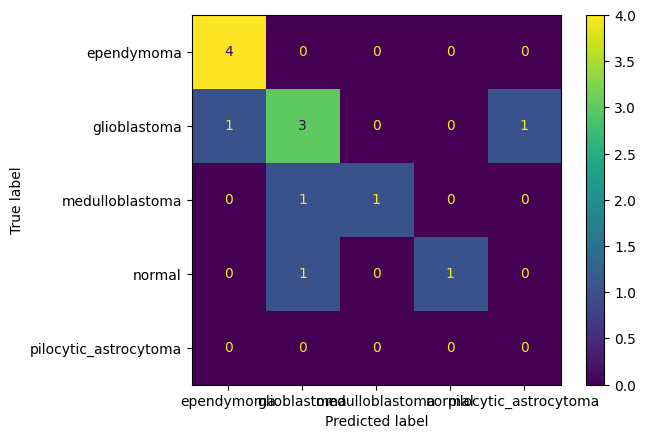

Confusion matrix for Quantized Plaintext: 


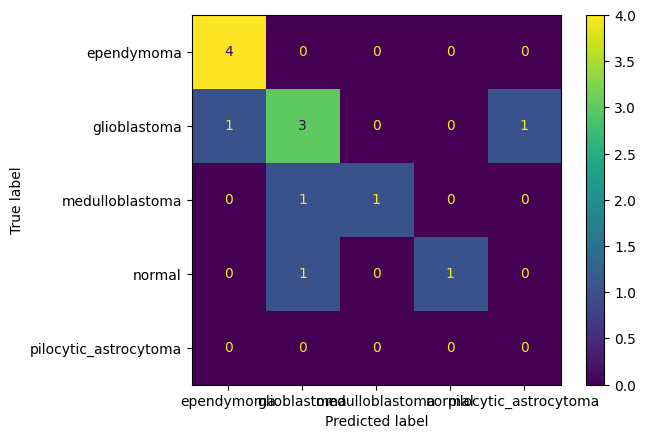

Confusion matrix for FHE: 


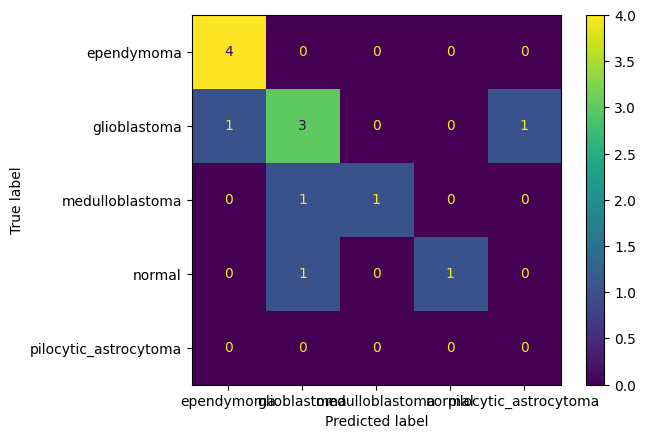

Running time is 1.5345146656036377 seconds


In [ ]:
start_time = time.time()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("***Note: The diagonal elements are the correctly predicted samples. ***")

#use the scikit-learn classes because we use the same class naman

print("Confusion matrix for SKLearn Plaintext: ")
sklearn_cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_clear_LR), display_labels=le.classes_)
sklearn_cm_display.plot()
plt.show()

print("Confusion matrix for Quantized Plaintext: ")
concrete_plain_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_q_LR), display_labels=le.classes_)
concrete_plain_display.plot()
plt.show()

print("Confusion matrix for FHE: ")
concrete_fhe_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_fhe_LR), display_labels=le.classes_)
concrete_fhe_display.plot()
plt.show()

print(f"Running time is {time.time() - start_time} seconds")

In [ ]:
ependymoma_sample = dataset[dataset['samples'] == 879][most_important_features].to_numpy(dtype="uint16")
glioblastoma_sample = dataset[dataset['samples'] == 913][most_important_features].to_numpy(dtype="uint16")
medulloblastoma_sample = dataset[dataset['samples'] == 935][most_important_features].to_numpy(dtype="uint16")
normal_sample = dataset[dataset['samples'] == 948][most_important_features].to_numpy(dtype="uint16")
pilocytic_astrocytoma_sample = dataset[dataset['samples'] == 963][most_important_features].to_numpy(dtype="uint16")

# Sklearn Inference Time

average = 0

start_time = time.time()
skmodel_LR.predict(ependymoma_sample)
end_time = time.time()
print(f"Running time for Sklearn inference of ependymoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
skmodel_LR.predict(glioblastoma_sample)
end_time = time.time()
print(f"Running time for Sklearn inference of glioblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
skmodel_LR.predict(medulloblastoma_sample)
end_time = time.time()
print(f"Running time for Sklearn inference of medulloblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
skmodel_LR.predict(normal_sample)
end_time = time.time()
print(f"Running time for Sklearn inference of normal_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
skmodel_LR.predict(pilocytic_astrocytoma_sample)
end_time = time.time()
print(f"Running time for Sklearn inference of pilocytic_astrocytoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

average /= 5

print(f"Average running time of Sklearn inference for each class is {average} seconds")

Running time for Sklearn inference of ependymoma_sample is 0.0003428459167480469 seconds
Running time for Sklearn inference of glioblastoma_sample is 0.0002002716064453125 seconds
Running time for Sklearn inference of medulloblastoma_sample is 0.0002033710479736328 seconds
Running time for Sklearn inference of normal_sample is 0.00018024444580078125 seconds
Running time for Sklearn inference of pilocytic_astrocytoma_sample is 0.00016021728515625 seconds
Average running time of Sklearn inference for each class is 0.00021739006042480468 seconds


In [ ]:
# Quantized Plaintext Inference Time

average = 0

start_time = time.time()
quant_LR.predict(ependymoma_sample)
end_time = time.time()
print(f"Running time for quantized plaintext inference of ependymoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(glioblastoma_sample)
end_time = time.time()
print(f"Running time for quantized plaintext inference of glioblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(medulloblastoma_sample)
end_time = time.time()
print(f"Running time for quantized plaintext inference of medulloblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(normal_sample)
end_time = time.time()
print(f"Running time for quantized plaintext inference of normal_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(pilocytic_astrocytoma_sample)
end_time = time.time()
print(f"Running time for quantized plaintext inference of pilocytic_astrocytoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

average /= 5

print(f"Average running time of quantized plaintext inference for each class is {average} seconds")

Running time for quantized plaintext inference of ependymoma_sample is 0.0012981891632080078 seconds
Running time for quantized plaintext inference of glioblastoma_sample is 0.0002532005310058594 seconds
Running time for quantized plaintext inference of medulloblastoma_sample is 0.0002295970916748047 seconds
Running time for quantized plaintext inference of normal_sample is 0.00023102760314941406 seconds
Running time for quantized plaintext inference of pilocytic_astrocytoma_sample is 0.0002224445343017578 seconds
Average running time of quantized plaintext inference for each class is 0.00044689178466796877 seconds


In [ ]:
# FHE Inference Time

average = 0

start_time = time.time()
quant_LR.predict(ependymoma_sample, fhe="execute")
end_time = time.time()
print(f"Running time for FHE inference of ependymoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(glioblastoma_sample, fhe="execute")
end_time = time.time()
print(f"Running time for FHE inference of glioblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(medulloblastoma_sample, fhe="execute")
end_time = time.time()
print(f"Running time for FHE inference of medulloblastoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(normal_sample, fhe="execute")
end_time = time.time()
print(f"Running time for FHE inference of normal_sample is {end_time - start_time} seconds")

average += end_time - start_time

start_time = time.time()
quant_LR.predict(pilocytic_astrocytoma_sample, fhe="execute")
end_time = time.time()
print(f"Running time for FHE inference of pilocytic_astrocytoma_sample is {end_time - start_time} seconds")

average += end_time - start_time

average /= 5

print(f"Average running time of FHE inference for each class is {average} seconds")

Running time for FHE inference of ependymoma_sample is 0.009979486465454102 seconds
Running time for FHE inference of glioblastoma_sample is 0.007439851760864258 seconds
Running time for FHE inference of medulloblastoma_sample is 0.0068128108978271484 seconds
Running time for FHE inference of normal_sample is 0.006875276565551758 seconds
Running time for FHE inference of pilocytic_astrocytoma_sample is 0.006755352020263672 seconds
Average running time of FHE inference for each class is 0.007572555541992187 seconds


In [ ]:
#Attempting to save the model
from concrete.ml.deployment import FHEModelClient, FHEModelDev, FHEModelServer

start_time = time.time()

fhemodel_dev = FHEModelDev("gdrive/MyDrive/Special-Problem-Colab/Brain-Tumor-Models/Final-Models/LR-2", quant_LR)
fhemodel_dev.save()

print(f"Running time for saving the FHE model is {time.time() - start_time} seconds")

Running time for saving the FHE model is 0.8381950855255127 seconds
